# Supervised Learning Challenge

## Module 19 Checkpoint 8

## The Assignment:

The housing market is one of the most crucial parts of the economy for every country. Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a very central topic in economic and financial circles.

The house price dataset from Kaggle includes several features of the houses along with their sale prices at the time they are sold. So far, in this module, you built and implemented some models using this dataset.

In this challenge, you are required to improve your model with respect to its prediction performance.

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks.

## Load the houseprices data from Thinkful's database.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

## Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.

In [2]:
# how is the data formatted?
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [3]:
# what does the data actually look like?
house_prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
# what general numeric info can we gather on the available parameters?
house_prices_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# separate into numeric and non-numeric parameters for further evaluation
numeric_columns = house_prices_df.select_dtypes(['int64', 'float64']).columns
non_numeric_columns = house_prices_df.select_dtypes(['object']).columns

In [6]:
# which parameters are missing data, and is the missing data significant?
total_missing = house_prices_df.isnull().sum().sort_values(ascending=False)
percent_missing = (house_prices_df.isnull().sum()/house_prices_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

# avoid using parameters with too much missing data - I'll use a 5% max here if necessary

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


Out of the 81 columns, 19 of them are missing data and 62 are complete - with so many complete variables available, there is no need to use imputation on any of the incomplete ones, the complete variables should be more than sufficient to get the ball rolling!

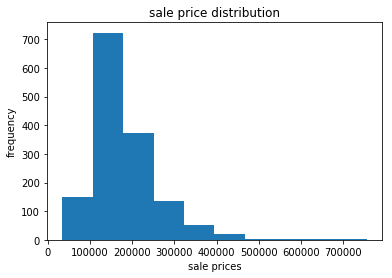

In [7]:
# what does the target distribution look like?
plt.hist(house_prices_df.saleprice)
plt.title("sale price distribution")
plt.xlabel("sale prices")
plt.ylabel("frequency")
plt.show()

Clearly the target variable is not distributed normally, this will likely need to be transformed later when running models.

In [8]:
# find which numeric variables are correlated most strongly with sale price
np.abs(house_prices_df[numeric_columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

In [9]:
# choose some non-numerics, create dummies

house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.lotshape, prefix="lotshape", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.landcontour, prefix="landcontour", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.utilities, prefix="utilities", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns) + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns) + list(pd.get_dummies(house_prices_df.lotshape, prefix="lotshape", drop_first=True).columns) + list(pd.get_dummies(house_prices_df.landcontour, prefix="landcontour", drop_first=True).columns) + list(pd.get_dummies(house_prices_df.utilities, prefix="utilities", drop_first=True).columns)

# is there a way to make that final line more readable...trying to add line breaks causes errors, figure this out later

In [10]:
# choose the 5 numerics most correlated with target plus the dummies created from non-numerics

X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]
Y = house_prices_df.saleprice

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     299.5
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                -17441.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1442   BIC:                         3.501e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.327e+05   1.82e+04     -7.278      0.000   -1.68e+05   -9.69e+04
overallqual       2.277e+04   1078.241     21.114      0.000    2.07e+04    2.49e+04
grlivarea           46.7715      2.454     19.063      0.000      41.959      51.584
garagecars        1.176e+04   2941.273      3.999      0.000    5992.261    1.75e+04
garagearea          17.5342     10.218      1.716      0.086      -2.510      37.578
totalbsmtsf         28.5163      2.893      9.858      0.000      22.842      34.191
mszoning_FV       3.035e+04   1.35e+04      2.252      0.024    3915.336    5.68e+04
mszoning_RH       1.868e+04   1.56e+04      1.197      0.231   -1.19e+04    4.93e+04
mszoning_RL        3.14e+04   1.25e+04      2.508      0.012    6840.335     5.6e+04
mszoning_RM       1.505e+04   1.27e+04      1.187      0.236   -9829.745    3.99e+04
street_Pave       1246.6129   1.61e+04      0.077      0.938   -3.03e+04    3.28e+04
lotshape_IR2      1.432e+04   6176.918      2.318      0.021    2198.802    2.64e+04
lotshape_IR3     -4.059e+04   1.22e+04     -3.335      0.001   -6.45e+04   -1.67e+04
lotshape_Reg     -6384.7286   2245.544     -2.843      0.005   -1.08e+04   -1979.846
landcontour_HLS   3.513e+04   7272.865      4.830      0.000    2.09e+04    4.94e+04
landcontour_Low   4.031e+04   8017.724      5.027      0.000    2.46e+04     5.6e+04
landcontour_Lvl   1.848e+04   4991.280      3.703      0.000    8693.799    2.83e+04
utilities_NoSeWa -3.648e+04   3.76e+04     -0.970      0.332    -1.1e+05    3.73e+04
==============================================================================
Omnibus:                      397.740   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27827.963
Skew:                           0.252   Prob(JB):                         0.00
Kurtosis:                      24.382   Cond. No.                     7.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are some statistically insignificant features present (garagearea, 2 of the mszoning, street, and utilities).

Let's remove these and log-transform the target to see if that improves the model.

In [11]:
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'mszoning_FV', 'mszoning_RL',
                    'lotshape_IR2', 'lotshape_IR3', 'lotshape_Reg', 'landcontour_HLS', 'landcontour_Low', 'landcontour_Lvl']]

Y = np.log1p(house_prices_df['saleprice'])

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     580.6
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                 553.81
No. Observations:                1460   AIC:                            -1082.
Df Residuals:                    1447   BIC:                            -1013.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.4629      0.031    342.314      0.000      10.403      10.523
overallqual         0.1212      0.005     25.580      0.000       0.112       0.131
grlivarea           0.0002   1.08e-05     19.313      0.000       0.000       0.000
garagecars          0.0998      0.008     13.175      0.000       0.085       0.115
totalbsmtsf         0.0001   1.25e-05      9.459      0.000    9.39e-05       0.000
mszoning_FV         0.1894      0.024      7.814      0.000       0.142       0.237
mszoning_RL         0.1618      0.013     12.810      0.000       0.137       0.187
lotshape_IR2        0.0596      0.027      2.182      0.029       0.006       0.113
lotshape_IR3       -0.1758      0.054     -3.261      0.001      -0.282      -0.070
lotshape_Reg       -0.0391      0.010     -3.938      0.000      -0.059      -0.020
landcontour_HLS     0.1465      0.032      4.551      0.000       0.083       0.210
landcontour_Low     0.1768      0.035      5.007      0.000       0.108       0.246
landcontour_Lvl     0.0923      0.022      4.209      0.000       0.049       0.135
==============================================================================
Omnibus:                      698.905   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12420.427
Skew:                          -1.786   Prob(JB):                         0.00
Kurtosis:                      16.835   Cond. No.                     2.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Add in some combined features: totalsf and an interaction term utilizing that with the best feature so far: overallqual!

In [12]:
house_prices_df['totalsf'] = house_prices_df['totalbsmtsf'] + house_prices_df['firstflrsf'] + house_prices_df['secondflrsf']

house_prices_df['int_totalsf_overallqual'] = house_prices_df['totalsf'] * house_prices_df['overallqual']

X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'mszoning_FV', 'mszoning_RL', 'lotshape_IR2',
                     'lotshape_IR3', 'lotshape_Reg', 'landcontour_HLS', 'landcontour_Low', 'landcontour_Lvl', 'totalsf',
                     'int_totalsf_overallqual']]

Y = np.log1p(house_prices_df['saleprice'])

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     520.0
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                 581.29
No. Observations:                1460   AIC:                            -1133.
Df Residuals:                    1445   BIC:                            -1053.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      10.1478      0.053    190.294      0.000      10.043      10.252
overallqual                 0.1704      0.008     20.660      0.000       0.154       0.187
grlivarea                 5.42e-05   8.98e-05      0.603      0.546      -0.000       0.000
garagecars                  0.0955      0.007     12.743      0.000       0.081       0.110
totalbsmtsf             -3.242e-05   9.24e-05     -0.351      0.726      -0.000       0.000
mszoning_FV                 0.1750      0.024      7.328      0.000       0.128       0.222
mszoning_RL                 0.1537      0.012     12.312      0.000       0.129       0.178
lotshape_IR2                0.0621      0.027      2.316      0.021       0.010       0.115
lotshape_IR3               -0.1370      0.053     -2.573      0.010      -0.241      -0.033
lotshape_Reg               -0.0372      0.010     -3.814      0.000      -0.056      -0.018
landcontour_HLS             0.1341      0.032      4.228      0.000       0.072       0.196
landcontour_Low             0.1624      0.035      4.667      0.000       0.094       0.231
landcontour_Lvl             0.0789      0.022      3.639      0.000       0.036       0.121
totalsf                     0.0003   9.36e-05      3.145      0.002       0.000       0.000
int_totalsf_overallqual -1.955e-05   2.69e-06     -7.272      0.000   -2.48e-05   -1.43e-05
==============================================================================
Omnibus:                      428.382   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2955.080
Skew:                          -1.184   Prob(JB):                         0.00
Kurtosis:                       9.555   Cond. No.                     2.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Some features' coefficients are essentially 0, let's remove those and ensure it doesn't affect overall accuracy.

In [13]:
X = house_prices_df[['overallqual', 'garagecars', 'mszoning_FV', 'mszoning_RL', 'lotshape_IR2', 'lotshape_IR3', 'lotshape_Reg',
                     'landcontour_HLS', 'landcontour_Low', 'landcontour_Lvl', 'int_totalsf_overallqual']]

Y = np.log1p(house_prices_df['saleprice'])

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     541.6
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                 460.02
No. Observations:                1460   AIC:                            -896.0
Df Residuals:                    1448   BIC:                            -832.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      10.8009      0.035    305.174      0.000      10.731      10.870
overallqual                 0.0892      0.007     13.316      0.000       0.076       0.102
garagecars                  0.1106      0.008     13.774      0.000       0.095       0.126
mszoning_FV                 0.1871      0.026      7.231      0.000       0.136       0.238
mszoning_RL                 0.1642      0.013     12.301      0.000       0.138       0.190
lotshape_IR2                0.0693      0.029      2.385      0.017       0.012       0.126
lotshape_IR3               -0.1930      0.058     -3.347      0.001      -0.306      -0.080
lotshape_Reg               -0.0445      0.011     -4.207      0.000      -0.065      -0.024
landcontour_HLS             0.1214      0.034      3.547      0.000       0.054       0.188
landcontour_Low             0.1606      0.037      4.286      0.000       0.087       0.234
landcontour_Lvl             0.0758      0.023      3.256      0.001       0.030       0.122
int_totalsf_overallqual  1.809e-05   1.05e-06     17.166      0.000     1.6e-05    2.02e-05
==============================================================================
Omnibus:                      748.052   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17681.817
Skew:                          -1.868   Prob(JB):                         0.00
Kurtosis:                      19.635   Cond. No.                     2.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The F statistic increased, although this reduced model performs worse in other metrics (r-squared, AIC, BIC).

For now, we'll carry on testing both feature sets and see the difference between them.

In [14]:
# differentiate the 2 feature sets

X1 = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'mszoning_FV', 'mszoning_RL', 'lotshape_IR2',
                     'lotshape_IR3', 'lotshape_Reg', 'landcontour_HLS', 'landcontour_Low', 'landcontour_Lvl', 'totalsf',
                     'int_totalsf_overallqual']]

X2 = house_prices_df[['overallqual', 'garagecars', 'mszoning_FV', 'mszoning_RL', 'lotshape_IR2', 'lotshape_IR3',
                      'lotshape_Reg', 'landcontour_HLS', 'landcontour_Low', 'landcontour_Lvl', 'int_totalsf_overallqual']]

## Now, split your data into train and test sets where 20% of the data resides in the test set.

In [15]:
# start with the full feature set

Y = np.log1p(house_prices_df['saleprice'])

X = X1

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     424.8
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                 458.16
No. Observations:                1168   AIC:                            -886.3
Df Residuals:                    1153   BIC:                            -810.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      10.2193      0.059    171.792      0.000      10.103      10.336
overallqual                 0.1602      0.009     17.555      0.000       0.142       0.178
grlivarea                 6.11e-05      0.000      0.611      0.541      -0.000       0.000
garagecars                  0.0940      0.008     11.202      0.000       0.078       0.110
totalbsmtsf              -4.18e-05      0.000     -0.406      0.685      -0.000       0.000
mszoning_FV                 0.1839      0.027      6.824      0.000       0.131       0.237
mszoning_RL                 0.1564      0.014     11.011      0.000       0.129       0.184
lotshape_IR2                0.0537      0.030      1.808      0.071      -0.005       0.112
lotshape_IR3               -0.2790      0.070     -3.987      0.000      -0.416      -0.142
lotshape_Reg               -0.0442      0.011     -4.022      0.000      -0.066      -0.023
landcontour_HLS             0.1145      0.035      3.301      0.001       0.046       0.183
landcontour_Low             0.1453      0.041      3.520      0.000       0.064       0.226
landcontour_Lvl             0.0680      0.024      2.792      0.005       0.020       0.116
totalsf                     0.0003      0.000      2.587      0.010     6.5e-05       0.000
int_totalsf_overallqual -1.533e-05   2.96e-06     -5.179      0.000   -2.11e-05   -9.52e-06
==============================================================================
Omnibus:                      335.689   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2244.346
Skew:                          -1.152   Prob(JB):                         0.00
Kurtosis:                       9.388   Cond. No.                     2.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# next, try the reduced feature set

Y = np.log1p(house_prices_df['saleprice'])

X = X2

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     450.3
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                 390.37
No. Observations:                1168   AIC:                            -756.7
Df Residuals:                    1156   BIC:                            -696.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      10.8319      0.039    275.852      0.000      10.755      10.909
overallqual                 0.0813      0.007     11.011      0.000       0.067       0.096
garagecars                  0.1160      0.009     13.021      0.000       0.099       0.133
mszoning_FV                 0.2014      0.029      7.018      0.000       0.145       0.258
mszoning_RL                 0.1760      0.015     11.950      0.000       0.147       0.205
lotshape_IR2                0.0751      0.032      2.358      0.019       0.013       0.138
lotshape_IR3               -0.2720      0.064     -4.246      0.000      -0.398      -0.146
lotshape_Reg               -0.0470      0.012     -4.068      0.000      -0.070      -0.024
landcontour_HLS             0.1089      0.037      2.955      0.003       0.037       0.181
landcontour_Low             0.1601      0.040      3.954      0.000       0.081       0.240
landcontour_Lvl             0.0591      0.025      2.345      0.019       0.010       0.109
int_totalsf_overallqual  1.915e-05   1.16e-06     16.453      0.000    1.69e-05    2.14e-05
==============================================================================
Omnibus:                      610.592   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17495.886
Skew:                          -1.836   Prob(JB):                         0.00
Kurtosis:                      21.602   Cond. No.                     2.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The reduced feature set still performs worse in every metric except for F statistic, which is extremely similar to the larger feature set...test other models only on the larger feature set.

## Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!

In [17]:
# set the independent/dependent variables + hyperparameters for model testing

Y = np.log1p(house_prices_df['saleprice'])

X = X1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

alphas = [np.power(10.0,p) for p in np.arange(-20,40,1)]

In [18]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8248016088905965
-----Test set statistics-----
R-squared of the model in test set is: 0.8620988269601094
Mean absolute error of the prediction is: 0.11490857079423235
Mean squared error of the prediction is: 0.024918269405618455
Root mean squared error of the prediction is: 0.1578552165929858
Mean absolute percentage error of the prediction is: 0.9579349536698583


In [19]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.8247671102755844
-----Test set statistics-----
R-squared of the model in test set is: 0.8622596646478689
Mean absolute error of the prediction is: 0.11474042878322599
Mean squared error of the prediction is: 0.024889206586602357
Root mean squared error of the prediction is: 0.15776313443451342
Mean absolute percentage error of the prediction is: 0.9564532853136452


In [20]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1.0
R-squared of the model in training set is: 0.8247572614448051
-----Test set statistics-----
R-squared of the model in test set is: 0.862322373460356
Mean absolute error of the prediction is: 0.1146876885841064
Mean squared error of the prediction is: 0.024877875319077838
Root mean squared error of the prediction is: 0.1577272180667555
Mean absolute percentage error of the prediction is: 0.9559965211406816


In [21]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.001
R-squared of the model in training set is: 0.8238067868553096
-----Test set statistics-----
R-squared of the model in test set is: 0.8619358933707811
Mean absolute error of the prediction is: 0.11436899391259238
Mean squared error of the prediction is: 0.024947710946865792
Root mean squared error of the prediction is: 0.1579484439520244
Mean absolute percentage error of the prediction is: 0.952953192215201


## Evaluate your best model on the test set.

All models performed relatively similarly to each other. Rerunning with a different random seed will yield slightly different preferences for one over the others, but this is a good indication that all are performing extremely similarly.

## So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

Let's try adding the interest rate in - first, check the overall date range we have to work with and see which months/years are represented.

In [22]:
house_prices_df.groupby(['yrsold','mosold']).size().reset_index().rename(columns={0:'count'})

,yrsold,mosold,count
0,2006,1,10
1,2006,2,9
2,2006,3,25
3,2006,4,27
4,2006,5,38
5,2006,6,48
6,2006,7,67
7,2006,8,23
8,2006,9,15
9,2006,10,24


In [23]:
# set the interest rate based on the first of each month according to https://en.wikipedia.org/wiki/History_of_Federal_Open_Market_Committee_actions

house_prices_df.loc[(house_prices_df['yrsold'] == 2006) & (house_prices_df['mosold'] >= 1), 'interest'] = 4.25
house_prices_df.loc[(house_prices_df['yrsold'] == 2006) & (house_prices_df['mosold'] >= 2), 'interest'] = 4.5
house_prices_df.loc[(house_prices_df['yrsold'] == 2006) & (house_prices_df['mosold'] >= 4), 'interest'] = 4.75
house_prices_df.loc[(house_prices_df['yrsold'] == 2006) & (house_prices_df['mosold'] >= 6), 'interest'] = 5
house_prices_df.loc[(house_prices_df['yrsold'] == 2006) & (house_prices_df['mosold'] >= 7), 'interest'] = 5.25
house_prices_df.loc[(house_prices_df['yrsold'] == 2007) & (house_prices_df['mosold'] >= 1), 'interest'] = 5.25
house_prices_df.loc[(house_prices_df['yrsold'] == 2007) & (house_prices_df['mosold'] >= 10), 'interest'] = 4.75
house_prices_df.loc[(house_prices_df['yrsold'] == 2007) & (house_prices_df['mosold'] >= 11), 'interest'] = 4.5
house_prices_df.loc[(house_prices_df['yrsold'] == 2008) & (house_prices_df['mosold'] >= 1), 'interest'] = 4.25
house_prices_df.loc[(house_prices_df['yrsold'] == 2008) & (house_prices_df['mosold'] >= 2), 'interest'] = 3
house_prices_df.loc[(house_prices_df['yrsold'] == 2008) & (house_prices_df['mosold'] >= 11), 'interest'] = 1
house_prices_df.loc[(house_prices_df['yrsold'] >= 2009), 'interest'] = 0.25

In [24]:
# set the independent/dependent variables + hyperparameters for model testing

Y = np.log1p(house_prices_df['saleprice'])

X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'mszoning_FV', 'mszoning_RL', 'lotshape_IR2',
                     'lotshape_IR3', 'lotshape_Reg', 'landcontour_HLS', 'landcontour_Low', 'landcontour_Lvl', 'totalsf',
                     'int_totalsf_overallqual', 'interest']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

alphas = [np.power(10.0,p) for p in np.arange(-20,40,1)]

In [25]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8346903519879035
-----Test set statistics-----
R-squared of the model in test set is: 0.828986566425663
Mean absolute error of the prediction is: 0.1186899968203537
Mean squared error of the prediction is: 0.028529467076090942
Root mean squared error of the prediction is: 0.16890668156142
Mean absolute percentage error of the prediction is: 0.9917206623818571


In [26]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1e-16
R-squared of the model in training set is: 0.8346892664186671
-----Test set statistics-----
R-squared of the model in test set is: 0.8289953170241995
Mean absolute error of the prediction is: 0.11869317650822234
Mean squared error of the prediction is: 0.02852800724976255
Root mean squared error of the prediction is: 0.16890236010714163
Mean absolute percentage error of the prediction is: 0.991746529767077


In [27]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1e-13
R-squared of the model in training set is: 0.8346903519879034
-----Test set statistics-----
R-squared of the model in test set is: 0.8289865664256619
Mean absolute error of the prediction is: 0.11868999682035421
Mean squared error of the prediction is: 0.02852946707609113
Root mean squared error of the prediction is: 0.16890668156142055
Mean absolute percentage error of the prediction is: 0.9917206623818611


In [28]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1e-19
R-squared of the model in training set is: 0.8346892664186673
-----Test set statistics-----
R-squared of the model in test set is: 0.8289953170241993
Mean absolute error of the prediction is: 0.11869317650822246
Mean squared error of the prediction is: 0.028528007249762573
Root mean squared error of the prediction is: 0.1689023601071417
Mean absolute percentage error of the prediction is: 0.9917465297670778


Once again, all 4 models perform *extremely* similarly to each other - however, it is difficult to tell a difference between the models with/without interest rate included (rerunning this model multiple times with a different random seed yields slightly different results each time). Including *pertinent* external data is clearly a good way to improve model prediction, although determining both the usefulness and applicability of such data leaves much to the discretion of the user.